## EDA Analysis - Hotel booking analysis 

# Data cleaning and handling missing values :


1.Imputation Strategy: What imputation methods would you consider for handling the missing values in columns such as agent?

2.Dropping Null Values: Are there any columns with a high percentage of null values that you would consider dropping entirely from the dataset? If so, which ones and why?

3.What is the most appropriate way to impute missing values in the agent column? Should we use the mean, median, or a more complex imputation method? Should we consider creating a separate category for missing values?

4.The arrival_date_month column has values like "July", "August", etc. Should you convert these to numerical values (e.g., 7 for July, 8 for August)? What are the potential advantages and disadvantages of such a conversion?


# Visualisation :


1. Create a visualisation that shows the percentage of cancellations over time (e.g., by month or year). What patterns emerge? Are there any specific periods where cancellations are higher?
2. Visualize the distribution of reserved_room_type using a bar chart. Which room types are most popular? How do preferences vary across different market segments (e.g., market_segment)?
3. Create a grouped bar chart that displays the cancellation rate (percentage of cancellations) for each arrival month. Are there any months with consistently high cancellation rates?
4. Create a box plot or violin plot of the lead_time column for different market_segment values. Are there any significant differences in booking patterns across market segmanets ?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Loading the dataset

data = pd.read_csv("C:/Users/91771/Downloads/Hotel Booking - hotel_bookings.csv")

In [5]:
#Inspecting basics details of dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.describe() #statiscal analysis

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
#Checking for missing values % in each column

percentage_of_missing_values_in_each_column = data.isnull().sum()/len(data)*100

print(percentage_of_missing_values_in_each_column)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
#In the datset we have 3 columns i.e country, agent and company that contains missing values to deal with we will perform imputation replacing 

In [9]:
data['country'].fillna("Not available", inplace = True) 

data['agent'].fillna("Not available", inplace = True)

data['company'].fillna("Not available", inplace = True)


C:\Users\91771\AppData\Local\Temp\ipykernel_21520\2780822717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna("Not available", inplace = True)
C:\Users\91771\AppData\Local\Temp\ipykernel_21520\2780822717.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [10]:
#Verifying the missing values conversion

data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
#Now we dont have any missing values in our dataset

In [12]:
#Changing the string entries in column arrival_date_month to numeric one eg : uly to 7

month_mapping ={'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12}

data['arrival_date_month']=data['arrival_date_month'].map(month_mapping)

In [13]:
#Verifying the conversion
data.head(39)

#Succesfully converted

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,Not available,Not available,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,Not available,Not available,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,Not available,Not available,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,Not available,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,Not available,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,Not available,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,7,27,1,0,2,2,...,No Deposit,Not available,Not available,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,7,27,1,0,2,2,...,No Deposit,303.0,Not available,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,No Deposit,240.0,Not available,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,No Deposit,15.0,Not available,0,Transient,105.50,0,0,Canceled,2015-04-22


## Visualisation


1. Create a visualisation that shows the percentage of cancellations over time (e.g., by month or year). What patterns emerge? Are there any specific periods where cancellations are higher?
2. Visualize the distribution of reserved_room_type using a bar chart. Which room types are most popular? How do preferences vary across different market segments (e.g., market_segment)?
3. Create a grouped bar chart that displays the cancellation rate (percentage of cancellations) for each arrival month. Are there any months with consistently high cancellation rates?
4. Create a box plot or violin plot of the lead_time column for different market_segment values. Are there any significant differences in booking patterns across market segments?

In [15]:
#Checking the % of cancellations rate over months and years
percentage_of_cancellations_over_year = data.groupby('arrival_date_year')['is_canceled'].mean()*100
print(percentage_of_cancellations_over_year)

arrival_date_year
2015    37.015821
2016    35.863297
2017    38.697864
Name: is_canceled, dtype: float64


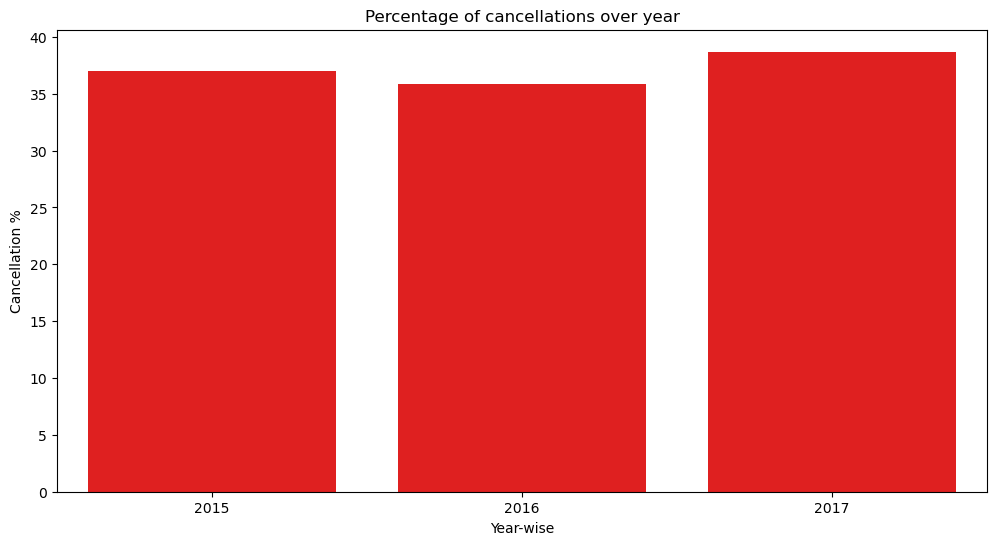

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(percentage_of_cancellations_over_year, color = 'red')
plt.title("Percentage of cancellations over year")
plt.xlabel("Year-wise")
plt.ylabel("Cancellation %")
plt.show()

In [52]:
percentage_of_cancellations_over_month = data.groupby('arrival_date_month')['is_canceled'].mean()*100
print(percentage_of_cancellations_over_month)

arrival_date_month
1     30.477315
2     33.415964
3     32.152338
4     40.797186
5     39.665847
6     41.457172
7     37.453598
8     37.753117
9     39.170156
10    38.046595
11    31.233441
12    34.970501
Name: is_canceled, dtype: float64


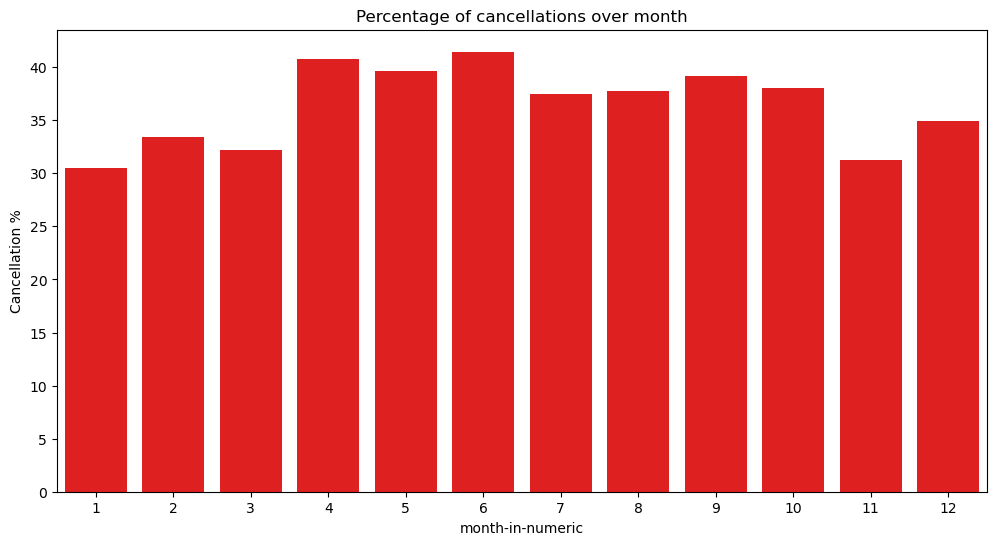

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(percentage_of_cancellations_over_month, color='red')
plt.title("Percentage of cancellations over month")
plt.xlabel("month-in-numeric")
plt.ylabel("Cancellation %")
plt.show()

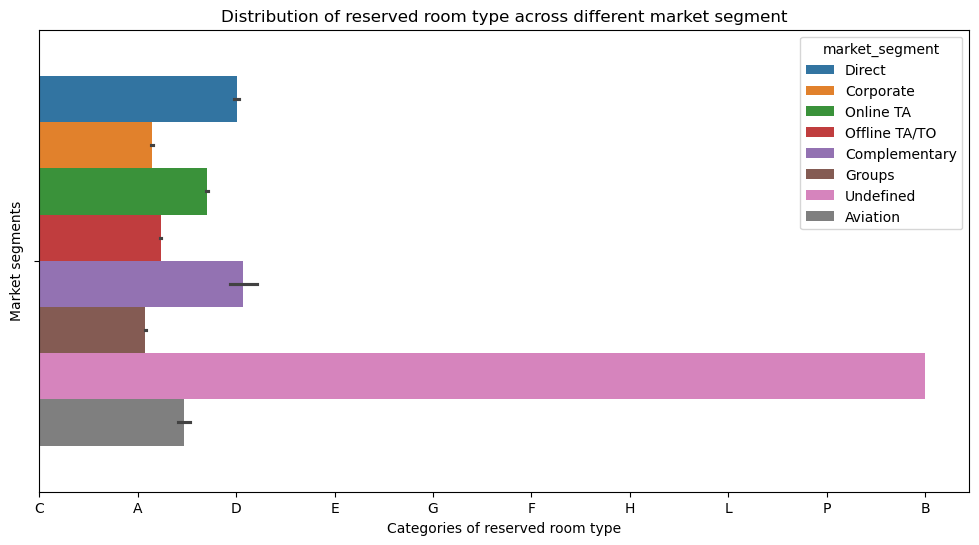

In [82]:
#Distribution of reserved_room_type across different market segment

plt.figure(figsize=(12, 6))
sns.barplot(data=data ,x ='reserved_room_type', hue ='market_segment')
plt.title("Distribution of reserved room type across different market segment")
plt.xlabel("Categories of reserved room type")
plt.ylabel("Market segments")
plt.show()

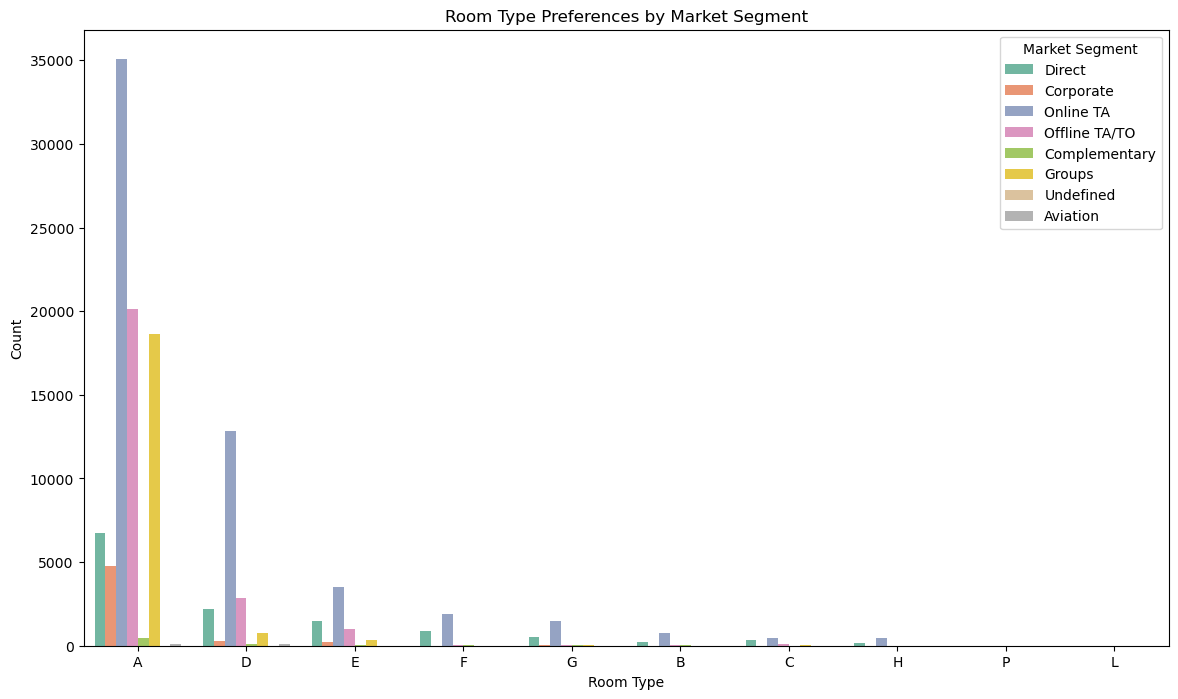

In [104]:
#same visualization in another style

plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='reserved_room_type', hue='market_segment', palette='Set2', order=data['reserved_room_type'].value_counts().index)
plt.title('Room Type Preferences by Market Segment')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Market Segment', loc='upper right')
plt.show()

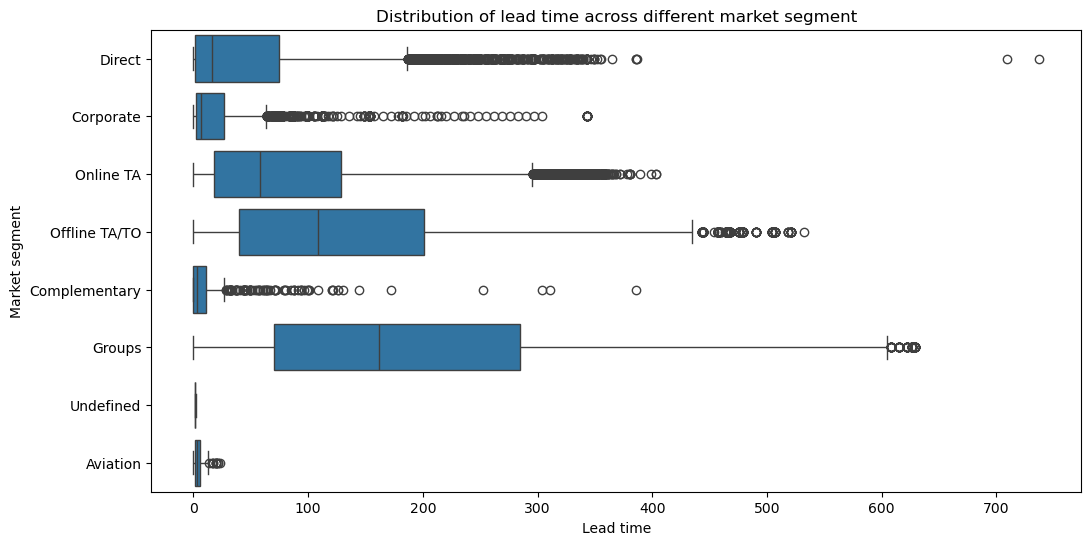

In [100]:
#Box plot of the lead_time column for different market_segment values

plt.figure(figsize=(12, 6))
sns.boxplot(data = data , x='lead_time' , y = 'market_segment')
plt.title("Distribution of lead time across different market segment")
plt.xlabel('Lead time')
plt.ylabel('Market segment')

plt.show()